# Function Testing Notebook

This notebook is meant to test external-facing functions to ensure they are working as expected.

In [1]:
import sys
from pathlib import Path
import time
import tempfile

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import json

packageroot = Path('../../').resolve()
print(packageroot)
sys.path.append(str(packageroot))


/Users/ohy2/Documents/GitHubRepo/PyEEG


In [2]:
from pythoneeg import core
from pythoneeg import visualization

from pythoneeg.visualization.results import WindowAnalysisResult, AnimalOrganizer# from pythoneeg import constants

from pythoneeg.visualization.plotting import ExperimentPlotter

# print(core.__all__)
# print(visualization.__all__)
# # print(dir(constants))

/Users/ohy2/Documents/GitHubRepo/PyEEG/.venv_mouseEEG/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tempfile.tempdir = '/scr1/users/dongjp'

In [ ]:
tmpmet = core.DDFBinaryMetadata(r"/Volumes/marsh_single_unit/PythonEEG Data Bins/A5 WT 12_12-2023/Cage 1 A5 -1_Meta.csv")
print(tmpmet.dt_end.ctime())
display(tmpmet.channel_names)

In [ ]:
# Had to manually copy A5 WT 12_12-2023 folder from marsh_single_unit

data_folder = Path('./test-data').resolve()
lrec = core.LongRecordingOrganizer(base_folder_path= data_folder / 'A5 WT 12_12-2023',
                                    truncate=3)
lrec.convert_colbins_to_rowbins(overwrite=False)
lrec.convert_rowbins_to_rec()

In [ ]:
lan = core.LongRecordingAnalyzer(lrec, 10)

lan.setup_njobs()
mags = []
phases = []

for i in range(lan.n_fragments // 100):
    if i == 20:
        break
    t = time.process_time()

    # lan.compute_nspike(i)
    # csd = lan.compute_csd(i)
    # plt.imshow(csd['alpha'])

    coh = lan.compute_cohere(i)
    plt.imshow(coh['gamma'])

    pcorr = lan.compute_pcorr(i)
    plt.imshow(pcorr)

    # cacoh = lan.compute_cacoh(i)
    # plt.imshow(cacoh[0])

    # cacoh = lan.compute_cacoh(i, freq_res=1, indices=([[0,1,2,3]], [[4,5,6,7]]))
    # mags.append(cacoh[0])
    # phases.append(cacoh[1])


    # fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    # ax[0].imshow(corr)
    # ax[1].imshow(pcorr)
    # plt.show()

    
# _, ax = plt.subplots(1, 2, figsize=(8, 2), sharex=True)
# mags = np.stack(mags, axis=-1).mean(axis=-1)
# phases = np.stack(phases, axis=-1).mean(axis=-1)
# ax[0].semilogx(cacoh[2], mags.transpose())
# ax[1].semilogx(cacoh[2], phases.transpose(), c='C1')
# ax[0].set_title("Magnitude")
# ax[1].set_title("Phase")
# plt.show()


In [3]:
wars = []
animal_ids = ['A5', 'A10', 'F22', 'G25']
for animal_id in animal_ids:
    wars.append(visualization.WindowAnalysisResult.from_pickle_and_json(Path(f'./test-wars/{animal_id}').resolve()))

ep = visualization.ExperimentPlotter(wars)

#ep._process_feature_data('rms', 'animal')

# ep.plot_boxplot('rms')

# ep.plot_violin('rms')
# ep.plot_scatter('rms')

Channel names: 	['Intan Input (1)/PortB L Aud Ctx', 'Intan Input (1)/PortB L Vis Ctx', 'Intan Input (1)/PortB L Hipp', 'Intan Input (1)/PortB L Barrel', 'Intan Input (1)/PortB L Motor', 'Intan Input (1)/PortB R Motor', 'Intan Input (1)/PortB R Barrel', 'Intan Input (1)/PortB R Hipp', 'Intan Input (1)/PortB R Vis Ctx', 'Intan Input (1)/PortB R Aud Ctx']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']
Channel names: 	['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']
Channel names: 	['Intan Input (1)/PortD D-009', 'Intan Input (1)/PortD D-010', 'Intan Input (1)/PortD D-012'

/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/visualization/results.py:91: UserWarning: Intan Input (1)/PortC C-009 does not match name aliases. Assuming alias from number in channel name.
  warnings.warn(f"{channel_name} does not match name aliases. Assuming alias from number in channel name.")
/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/visualization/results.py:91: UserWarning: Intan Input (1)/PortC C-010 does not match name aliases. Assuming alias from number in channel name.
  warnings.warn(f"{channel_name} does not match name aliases. Assuming alias from number in channel name.")
/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/visualization/results.py:91: UserWarning: Intan Input (1)/PortC C-012 does not match name aliases. Assuming alias from number in channel name.
  warnings.warn(f"{channel_name} does not match name aliases. Assuming alias from number in channel name.")
/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/visualization/results.py:91: UserWarning: Intan Inp

Channel names: 	['Intan Input (1)/PortC LAud ctexC-009', 'Intan Input (1)/PortC Lvis ctexC-010', 'Intan Input (1)/PortC L hippC-012', 'Intan Input (1)/PortC Lbarrel', 'Intan Input (1)/PortC L motor', 'Intan Input (1)/PortC R motor', 'Intan Input (1)/PortC R barrel', 'Intan Input (1)/PortC R hippoc', 'Intan Input (1)/PortC Rvis', 'Intan Input (1)/PortC R aud']
Channel abbreviations: 	['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']


/Users/ohy2/Documents/GitHubRepo/PyEEG/pythoneeg/visualization/plotting/experiment.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.all = pd.concat(df_all, axis=0, ignore_index=True)


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='animal', ylabel='rms'>,
 None)

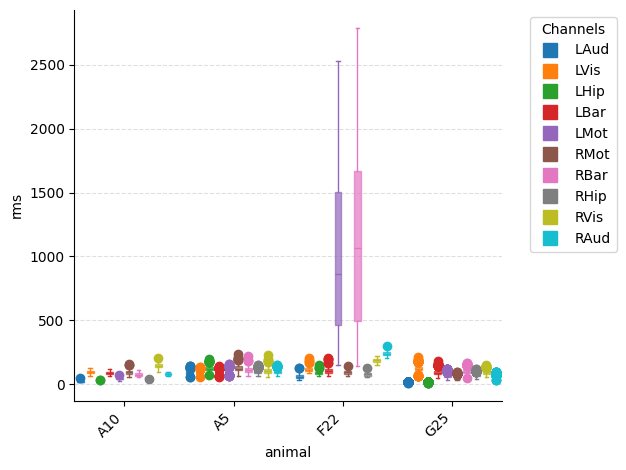

In [9]:
ep.plot_boxplot('rms', xgroup = 'animal', channels = 'all')

In [13]:
test = wars[0].get_result(['all'], allow_missing = True)

#test.iloc[0,:].cohere

(<Figure size 1600x400 with 8 Axes>,
 array([<Axes: title={'center': 'A10'}>, <Axes: title={'center': 'A5'}>,
        <Axes: title={'center': 'F22'}>, <Axes: title={'center': 'G25'}>],
       dtype=object),
 None)

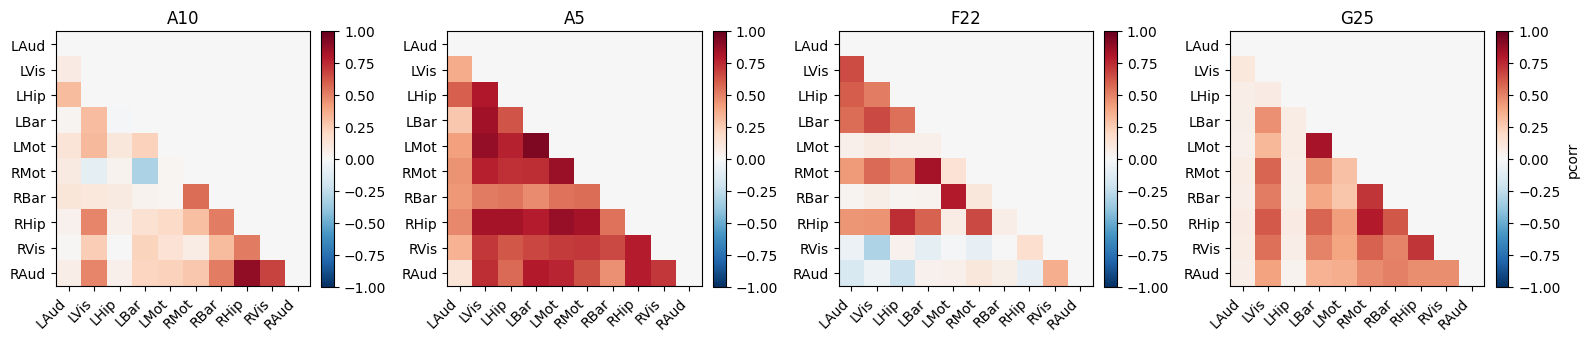

In [10]:
ep.plot_2d_feature('pcorr', xgroup = 'animal')

(<Figure size 800x1500 with 15 Axes>,
 array([[<Axes: title={'center': 'KO'}, ylabel='delta'>,
         <Axes: title={'center': 'WT'}>],
        [<Axes: ylabel='theta'>, <Axes: >],
        [<Axes: ylabel='alpha'>, <Axes: >],
        [<Axes: ylabel='beta'>, <Axes: >],
        [<Axes: ylabel='gamma'>, <Axes: >]], dtype=object),
 None)

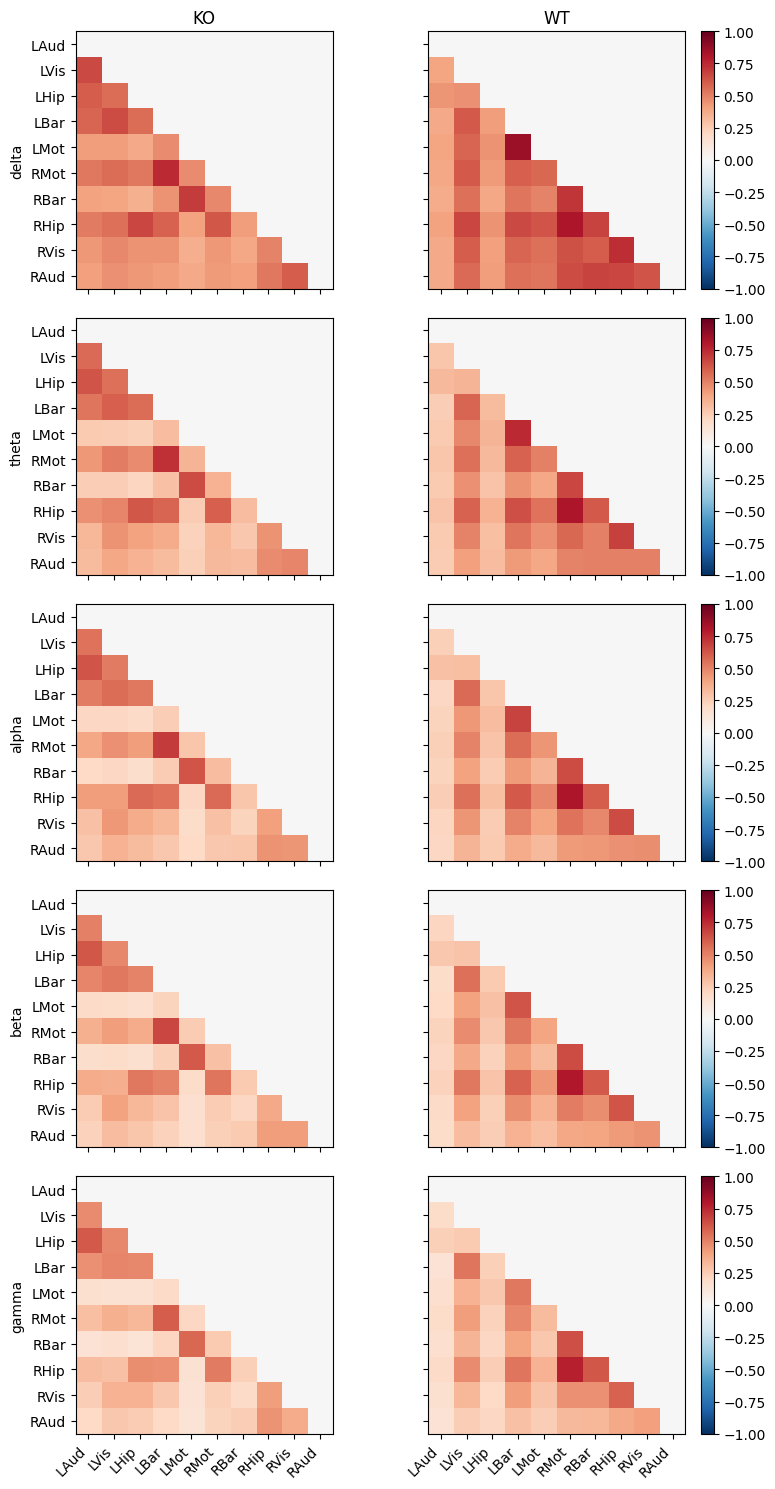

In [6]:
ep.plot_2d_feature_freq('cohere', xgroup='genotype')


In [14]:
wars[0].channel_names

['Intan Input (1)/PortB L Aud Ctx',
 'Intan Input (1)/PortB L Vis Ctx',
 'Intan Input (1)/PortB L Hipp',
 'Intan Input (1)/PortB L Barrel',
 'Intan Input (1)/PortB L Motor',
 'Intan Input (1)/PortB R Motor',
 'Intan Input (1)/PortB R Barrel',
 'Intan Input (1)/PortB R Hipp',
 'Intan Input (1)/PortB R Vis Ctx',
 'Intan Input (1)/PortB R Aud Ctx']

In [ ]:
epTest = ExperimentPlotter(reconstruct_war)


# Create different types of plots
fig, ax, stats = epTest.plot_boxplot(
    feature='psdslope',
    xgroup='animal',
    remove_outliers='iqr',
    outlier_threshold=3.0,
    show_outliers=False,
    title='psdslope Values by animal'
)

#TODO

#DONE:
# Make channel names cleaner in legend (or make it displayed on the x axis)
# change identifier to xgroup



# Plotting psd(band,total)

# Make it possible plot everything (channel x band), but allow arguments to filter out

# Make plotting function behave differently depending on shape of data (boxplot, heatmap)

# Make Spike sorting work

# statannotations: let you compare data between boxplot (python library) - try to implement this in the pipeline




In [11]:
from pythoneeg import constants

ep.channel_names

channel_names = list(constants.DEFAULT_ID_TO_NAME.values())
channel_names_orig = [war.channel_names for war in wars]

print(channel_names)
print(channel_names_orig)

channel_names_update = [list(constants.DEFAULT_ID_TO_NAME.values()) for _ in range(len(wars))]

print(channel_names_update)

['LAud', 'LVis', 'LHip', 'LBar', 'LMot', 'RMot', 'RBar', 'RHip', 'RVis', 'RAud']
[['Intan Input (1)/PortB L Aud Ctx', 'Intan Input (1)/PortB L Vis Ctx', 'Intan Input (1)/PortB L Hipp', 'Intan Input (1)/PortB L Barrel', 'Intan Input (1)/PortB L Motor', 'Intan Input (1)/PortB R Motor', 'Intan Input (1)/PortB R Barrel', 'Intan Input (1)/PortB R Hipp', 'Intan Input (1)/PortB R Vis Ctx', 'Intan Input (1)/PortB R Aud Ctx'], ['Intan Input (1)/PortC C-009', 'Intan Input (1)/PortC C-010', 'Intan Input (1)/PortC C-012', 'Intan Input (1)/PortC C-014', 'Intan Input (1)/PortC C-015', 'Intan Input (1)/PortC C-016', 'Intan Input (1)/PortC C-017', 'Intan Input (1)/PortC C-019', 'Intan Input (1)/PortC C-021', 'Intan Input (1)/PortC C-022'], ['Intan Input (1)/PortD D-009', 'Intan Input (1)/PortD D-010', 'Intan Input (1)/PortD D-012', 'Intan Input (1)/PortD D-014', 'Intan Input (1)/PortD D-015', 'Intan Input (1)/PortD D-016', 'Intan Input (1)/PortD D-017', 'Intan Input (1)/PortD D-019', 'Intan Input (1)/

In [9]:
test = wars[0].get_result(['all'], allow_missing=True)

TypeError: 'tuple' object is not callable